In [1]:
import requests
from bs4 import BeautifulSoup

In [5]:
failed_page = []
cust_name = []
cust_rate = []
rev_date = []
rev_title = []
rev_text = []
for p in range(1,50):
  link = "https://www.amazon.in/Samsung-Galaxy-10-1-Wi-Fi-Silver/product-reviews/B07SSTH14H/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(p)
  page = requests.get(link)
  if(str(page) == "<Response [200]>"):
    soup = BeautifulSoup(page.content,'html.parser')
    names = soup.select('span.a-profile-name')[2:]
    stars = soup.select('span.a-icon-alt')[3:]
    dates = soup.select('span.review-date')[2:]
    titles = soup.select('a.review-title span')
    reviews = soup.select('span.review-text span')
    for i in range(10):
      cust_name.append(names[i].getText())
      cust_rate.append(stars[i].getText().rstrip(" out of 5 stars"))
      rev_date.append(dates[i].getText().lstrip("Reviewed in India on "))
      rev_title.append(titles[i].getText())
      rev_text.append(reviews[i].getText().strip("\n "))
  else:
    failed_page.append(p)

In [6]:
import pandas as pd
df = pd.DataFrame()   ## empty dataframe
df['Date'] = rev_date
df['Customer Name'] = cust_name
df['Ratings'] = cust_rate
df['Review Title'] = rev_title
df['Reviews'] = rev_text
df.index = df.index+1
df

,Date,Customer Name,Ratings,Review Title,Reviews
1,1 July 2019,Satyaki Dandi,4.0,A more than decent buy for the price,"Pros:1. The price. For this range,the other op..."
2,29 June 2019,Kapil Sharma,5.0,Cheap and best...love it,Mindblowing tablet this is the cheap and best....
3,1 July 2019,Harmeet,5.0,"Brilliant , value for money. Looks and works l...","Ok so, i am a basic user buying a tab for educ..."
4,12 July 2019,AdiB,5.0,Great value for money for simple jobs,At Rs15k price it serves my purpose of1. Brows...
5,10 July 2019,Vikramaditya Reddy,5.0,Best Tab of the year,I have unboxed this Samsung galaxy tab A 2019 ...
...,...,...,...,...,...
356,2 March 2021,R S SIVA KUMAR,3.0,Screen too good and higher weight,Screen quality is really good. Weight is on hi...
357,14 September 2020,Deeppreet Bindra,3.0,Overall value for money!,Overall value for money! But the touch is not ...
358,24 August 2020,Gopal Dutta,1.0,Go for mini screentouch laptop,Not worthy
359,12 August 2020,Prasanthi P.,5.0,Received happily,excellent product who wants tab you can buy this.


In [9]:
df = [Reviews.strip() for Reviews in df.Reviews] # remove both the leading and the trailing characters
df= [Reviews for Reviews in df if Reviews] # removes empty strings, because they are considered in Python as False
df[0:10]

["Pros:1. The price. For this range,the other options available are too old to soon become expensive photo albums,or not upto the mark.2. The screen,though not amoled,has a crisp feel about it. I think its IPS...nevertheless its more than enough for reading,watching videos and other regular stuff. Though not a top notch screen for first person shooter games, it works just fine for all your other stuff. I'm not a avid gamer,so it doesn't really matter to me.3. The dual speakers are pretty loud and has more than expected crispness to the audio. There is a con though with the speakers,that I'll talk about later.4. Near stock android , and not overloaded with changes. So, it has a nice , easy to use , feel to it.5. The metal back and the compact size:screen ratio, makes it look and feel pretty premium .6. It has a nice big battery. Lasts me through the entire day, with casual use, with some to spare.7. 3.5mm Jack. 'Nuff said.8. No physical buttons. Really makes the tab , look and feel that

In [10]:
#sentiment analysis
afinn = pd.read_csv("C:/Users/1234/Downloads/Afinn.csv", sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [11]:
afinn.shape

(2477, 2)

In [12]:
# Now we check sentiment score for sentences(reviews)
from nltk import tokenize
sentences = tokenize.sent_tokenize(' '.join(df))
sentences[5:15]

['Though not a top notch screen for first person shooter games, it works just fine for all your other stuff.',
 "I'm not a avid gamer,so it doesn't really matter to me.3.",
 'The dual speakers are pretty loud and has more than expected crispness to the audio.',
 "There is a con though with the speakers,that I'll talk about later.4.",
 'Near stock android , and not overloaded with changes.',
 'So, it has a nice , easy to use , feel to it.5.',
 'The metal back and the compact size:screen ratio, makes it look and feel pretty premium .6.',
 'It has a nice big battery.',
 'Lasts me through the entire day, with casual use, with some to spare.7.',
 '3.5mm Jack.']

In [13]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Pros:1.
1,The price.
2,"For this range,the other options available are..."
3,"The screen,though not amoled,has a crisp feel ..."
4,I think its IPS...nevertheless its more than e...
...,...
932,Weight is on higher side.
933,So please make sure that you are ok with the w...
934,But the touch is not very effective as compare...
935,Not worthy excellent product who wants tab you...


In [14]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [15]:
#custom function: score each word in a sentence in lemmatised form
#but calculate score for whole original sentences
#!python -m spacy download en
import spacy
nlp = spacy.load('en_core_web_sm')

sentiment_laxicon = affinity_scores

In [16]:
sentiment_laxicon

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [17]:
def calculate_sentiment (text: str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score += sentiment_laxicon.get(word.lemma_, 0)
    return sent_score

In [18]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df

,sentence,sentiment_value
0,Pros:1.,0
1,The price.,0
2,"For this range,the other options available are...",0
3,"The screen,though not amoled,has a crisp feel ...",0
4,I think its IPS...nevertheless its more than e...,0
...,...,...
932,Weight is on higher side.,0
933,So please make sure that you are ok with the w...,1
934,But the touch is not very effective as compare...,2
935,Not worthy excellent product who wants tab you...,6


In [19]:
# how many words are in the sentence
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       1
1       2
2      19
3       9
4      15
       ..
932     5
933    17
934    12
935    11
936     5
Name: word_count, Length: 937, dtype: int64

In [20]:
sent_df

,sentence,sentiment_value,word_count
0,Pros:1.,0,1
1,The price.,0,2
2,"For this range,the other options available are...",0,19
3,"The screen,though not amoled,has a crisp feel ...",0,9
4,I think its IPS...nevertheless its more than e...,0,15
...,...,...,...
932,Weight is on higher side.,0,5
933,So please make sure that you are ok with the w...,1,17
934,But the touch is not very effective as compare...,2,12
935,Not worthy excellent product who wants tab you...,6,11


In [21]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
845,This is a perfect tab for students online clas...,16,35
890,Great screen quality and solid buildSound loud...,17,33
236,the overall rating for this tablet is 4 bcoz i...,19,248
807,"Camera could hv been bit more better, over all...",19,54
189,"Battery backup is amazing, sound quality is su...",19,25
139,I used my tab for 3-4 days and found satisfact...,20,165
182,I was bit skeptical to buy this TAB but after ...,20,225
843,The screen has a slight yellowish tint which i...,22,93
237,"This is best tablet with great price , screen ...",24,124
801,The build quality is amazing I really loved it...,27,47


In [22]:
# sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    937.000000
mean       2.128068
std        3.835372
min      -11.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       27.000000
Name: sentiment_value, dtype: float64

In [23]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,Pros:1.,0,1
1,The price.,0,2
2,"For this range,the other options available are...",0,19
3,"The screen,though not amoled,has a crisp feel ...",0,9
4,I think its IPS...nevertheless its more than e...,0,15
...,...,...,...
924,Galaxy Tab has developed a battery problem.,-2,7
925,"To claim warranty, I need a copy of invoice.",0,9
928,The battery life is up to the mark.,0,8
929,It came with Android 10.,0,5


In [24]:
sent_df[sent_df['sentiment_value']>=10]

,sentence,sentiment_value,word_count
59,We expect transparency from Amazon..... Best A...,13,27
139,I used my tab for 3-4 days and found satisfact...,20,165
182,I was bit skeptical to buy this TAB but after ...,20,225
189,"Battery backup is amazing, sound quality is su...",19,25
229,We have waited for this tab almost a month as ...,14,102
236,the overall rating for this tablet is 4 bcoz i...,19,248
237,"This is best tablet with great price , screen ...",24,124
241,"#For pdf study , online classes, notes...etc#M...",16,61
247,"The prouduct great,exelent quility,original pr...",12,42
254,"Box content- Tablet,Charger adaptor,type c cab...",15,178


In [25]:
sent_df['index']=range(0,len(sent_df))

In [26]:
sent_df=sent_df[['index']+['sentence']+['word_count']+['sentiment_value']]
sent_df.reset_index(drop=True)
sent_df

,index,sentence,word_count,sentiment_value
0,0,Pros:1.,1,0
1,1,The price.,2,0
2,2,"For this range,the other options available are...",19,0
3,3,"The screen,though not amoled,has a crisp feel ...",9,0
4,4,I think its IPS...nevertheless its more than e...,15,0
...,...,...,...,...
932,932,Weight is on higher side.,5,0
933,933,So please make sure that you are ok with the w...,17,1
934,934,But the touch is not very effective as compare...,12,2
935,935,Not worthy excellent product who wants tab you...,11,6


In [27]:
sentiment = []
for i in range(len(sent_df)):
  c = sent_df.iloc[i]['sentiment_value']
  if c>0:
    sentiment.append("pos")
  elif c<0:
    sentiment.append("neg")
  else:
    sentiment.append("neutral")
sent_df['Sentiment']=sentiment
sent_df

C:\Users\1234\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,index,sentence,word_count,sentiment_value,Sentiment
0,0,Pros:1.,1,0,neutral
1,1,The price.,2,0,neutral
2,2,"For this range,the other options available are...",19,0,neutral
3,3,"The screen,though not amoled,has a crisp feel ...",9,0,neutral
4,4,I think its IPS...nevertheless its more than e...,15,0,neutral
...,...,...,...,...,...
932,932,Weight is on higher side.,5,0,neutral
933,933,So please make sure that you are ok with the w...,17,1,pos
934,934,But the touch is not very effective as compare...,12,2,pos
935,935,Not worthy excellent product who wants tab you...,11,6,pos


<AxesSubplot:>

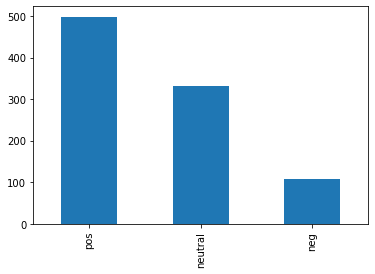

In [28]:
sent_df['Sentiment'].value_counts().plot(kind='bar')

C:\Users\1234\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

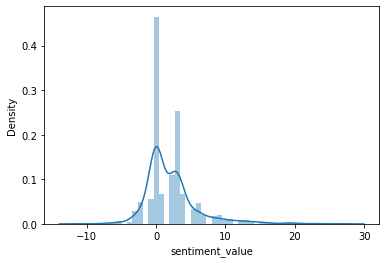

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

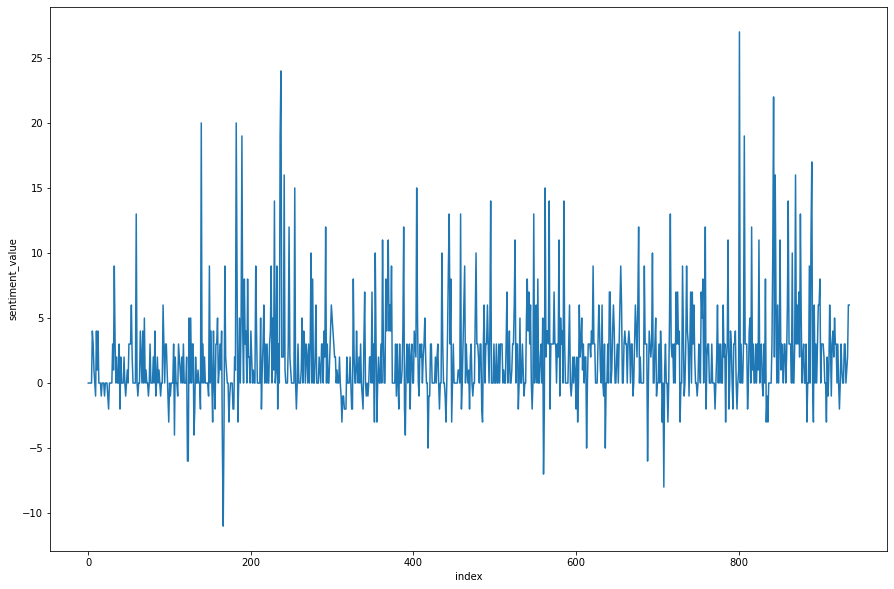

In [30]:
plt.figure(figsize=(15,10))
sns.lineplot(x='index', y='sentiment_value', data=sent_df)

<AxesSubplot:title={'center':'SENTENCE SENTIMENT VALUE TO SENTENCE WORD COUNT'}, xlabel='word_count', ylabel='sentiment_value'>

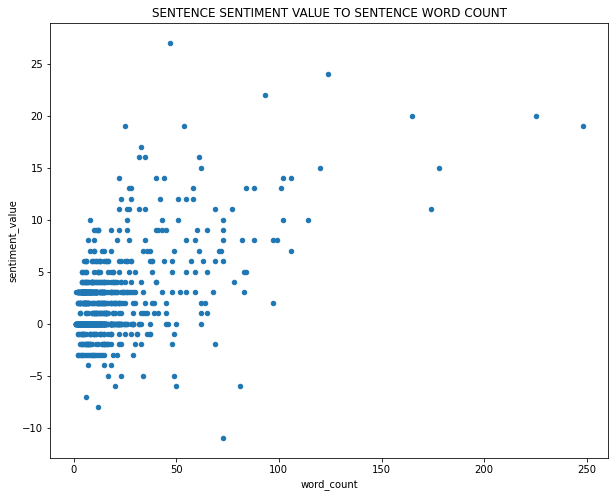

In [31]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(10,8), title='SENTENCE SENTIMENT VALUE TO SENTENCE WORD COUNT')